#Introduction to Sequential API

**Sequential API** is used to build machine learning models in a sequential way using Keras, which is a high-level API written in Python that allows us to easily construct and train deep learning models in TensorFlow 2.0. Keras has a simple, consistent interface that makes it easy to use, while still allowing us to build complex models.

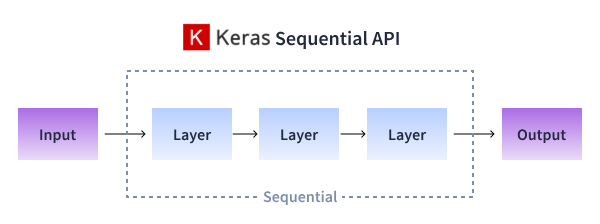


In Sequential API, we first add a layer to the model using the `Sequential.add()` method, then another layer, and so on, until we have built our desired model architecture. Once all the layers have been added, we can then compile the model and start training it on our data. We'll discuss this on subsequent screens where we'll build a model using the Sequential API. We'll learn how to create the layers, stack them together to form models, and then compile and train those models.

##Loading and Understanding the Data

In this lesson, we'll build a shallow neural network to predict our target variable, **mpg**, using predictor variables (i.e., variables that aren't the target variable).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

df = sns.load_dataset('mpg')

print(df.info())
print(df.head())
print(df.describe(include='all'))
stats = df['acceleration'].describe()
print(stats)

IQR = stats[6] - stats[4]
print(IQR)

In [3]:
var_missing = df.isna().sum().sum()
print(var_missing)

df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


df = df.drop(['name'],axis=1)
print(df.shape)

6
(398, 8)


<ipython-input-3-78538b340229>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['horsepower'].fillna(df['horsepower'].median(), inplace=True)


In [4]:
df = pd.get_dummies(df, columns=['origin'], drop_first=True, prefix='Origin')


df['horsepower'] = np.where(df['horsepower'] > 200, 200, df['horsepower'])
print(df['horsepower'].skew())

df = pd.get_dummies(df, columns=['cylinders'], drop_first=True, prefix='Cylinder')
df = pd.get_dummies(df, columns=['model_year'], drop_first=True, prefix='Year')

0.9467009182703371


##Train and Test set for Model Building

 before we move on to neural network model building with TensorFlow, we have a couple of quick tasks we need to perform.

 1. The first one is to create an array of the target variable (dependent variable) and an array of the predictor variables (independent variables).

 2. Since the scale of the predictor variables varies, it's a good idea to bring them into a uniform scale. One such technique is called normalization, which scales the predictor variables to have values between 0 and 1.

 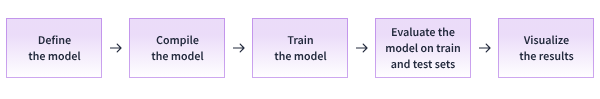

In [5]:
target_variable = ['mpg']
predictors = list(set(list(df.columns)) - set(target_variable))
df[predictors] = df[predictors] / df[predictors].max()

In [14]:
from sklearn.model_selection import train_test_split

X = df[predictors].values
y = df[target_variable].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=100)
print(X_train.shape); print(X_test.shape)

(278, 22)
(120, 22)


#Defining the Model

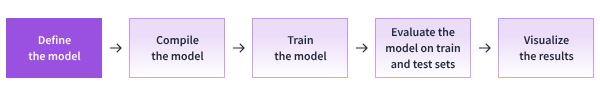

import these libraries automatically for you in the code editor throughout the course, so you won't need to remember to import them yourself.

    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers

To begin, we instantiate the model, which is done with the t`f.keras.Sequential()` constructor.
    
    model = tf.keras.Sequential()

The next step in defining the model, from an API perspective, is to define the layers of the model, which means specifying each layer with:

* number of nodes
* input shape
* activation function
* connection of layers to the output node

In our example, we want to build a shallow neural network with one hidden layer. The syntax is given below:

    model.add(tf.keras.layers.Dense(number_of_nodes,
    input_shape=(X_train.shape[1],)
    ,activation=activation_function))
    model.add(tf.keras.layers.Dense(1))

Notice the last layer, the output layer, only has **one node**. This is because we are predicting a single numerical value for the target variable `mpg`

In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(X_train.shape); print(X_test.shape)

#instantiate the model
model = tf.keras.Sequential()

#prepare a hidden layer with 32 nodes
    #input_shape = X_train
    #activation=relu

model.add(tf.keras.layers.Dense(units=32, input_shape=(X_train.shape[1],), activation='relu'))

#output layer with 1 node
model.add(tf.keras.layers.Dense(1))

model.summary()




(278, 22)
(120, 22)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

#Understanding Backpropagation

**Backpropagation** is a popular algorithm used in deep neural networks to adjust weights between layers of the network. For each layer, backpropagation calculates the error of the **output** compared to the **expected result** and uses that information to adjust the weights for future iterations. This process continues until either a satisfactory result has been achieved or until a maximum number of iterations have been reached.

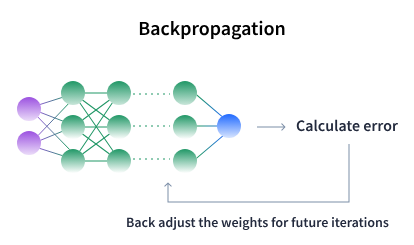

 This is the simple neural network with one hidden layer where we were trying to predict the salary of an individual based on two independent variables, `age` and `experience`.

 Given the weights, the neural network has estimated the predicted salary at `70`. Now suppose the actual value for this record was `60`, and if we take the simple error function to be the difference between actual and predicted value, the error comes out to be `10`

 Now this error, or loss function, goes through the optimizer which updates the weights to minimize the error through a backward pass.** The weights are updated to minimize the error.**

 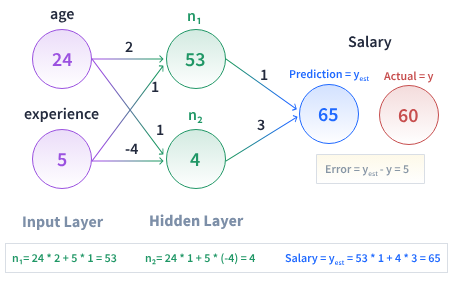

# Compiling the Model

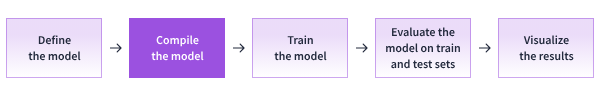

Once we've created the model, we need to compile it before it can be trained. Compiling a model requires us to specify an **optimizer** and a **loss function**.

* The optimizer is used to update the weights of the model during training.
* The loss function is used to calculate how well the model is performing.

There are many different types of optimizers and loss functions available in TensorFlow `Keras`, and the following sections discuss popular choices for both an **optimizer** and a **loss function.**

##Adam Optimizer

Adam is a popular optimizer used in many neural networks. Adam is an extension of the well-known **stochastic gradient descent (SGD)** algorithm. SGD is a simple and efficient approach to minimizing an objective function that has smooth, bounded gradients. However, SGD can be difficult to use when training deep neural networks because it requires careful tuning of the learning rate.

The Adam optimizer addresses this issue by using estimates of both first and second moments of the gradients to adaptively set the learning rate. This can lead to faster convergence and better performance on some problems.

To use the Adam optimizer with a Keras model in TensorFlow, we must first instantiate the Adam optimizer object with the following syntax:

    optimizer = tf.keras.optimizers.Adam()

One of the arguments to `tf.keras.optimizers.Adam()` is `learning_rate`, which controls how much the weights of the neural network model are updated during training.


In [16]:
#instantiate ADM() optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01)

#compiling the model with
#loss=mean absolute error (mae)
#metrics = mean absolute error (mae)
model.compile(loss='mae', metrics=['mae'], optimizer=optimizer)

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 32)                  │             736 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

None


#Train and Evaluate the model

##Train
    model.fit(X_train, y_train, epochs=epochs, verbose=0)

The `fit()` method takes in the training data as well as the number of epochs we want to train for. An `epoch` is one pass through the training data. For example, after training for 10 epochs, our model will be trained on all of the training data 10 times. The `verbose` parameter defines the level of detail returned while training. To reduce output clutter, we will usually set this to 0. The optimizer and the loss function we specified on the previous screen are used while training the model.

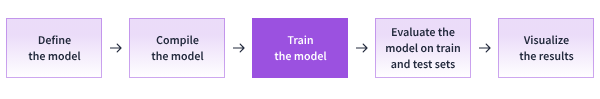


## Evaluate the Model

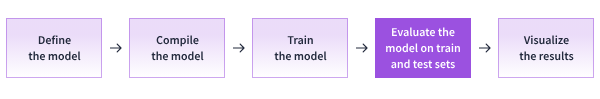

We have fit the shallow neural network model on the training set, and the next step is to evaluate the model. This is done with the evaluate() method as shown below:
      
    model.evaluate(X_train, y_train)
    Output
    0s 2ms/step - loss: 1.5393 - mae: 1.5393
    [1.5393279790878296, 1.5393279790878296]

The output prints the value for the loss function, which is `mae`, in our case. This comes out to be 1.54 for the training dataset. Note that these results may vary, and you might see slightly different values than this, which is fine! Also, we see that the value is repeated twice. This is because when we compiled the model, we specified that the `loss` function and the `metrics` both use the mean absolute error, i.e., mae.


##Coeficient of Determination

**Mean absolute error (MAE)** is a good metric, but sometimes it can be difficult to explain it from a model performance perspective. In this case, a more intuitive metric to use is the coefficient of determination, or R-squared value.

**R-squared** is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination, or the coefficient of multiple determination for multiple regression

To compute the **R-squared** value, we'll need the predicted value and the actual value, as well as the r2_score() function from scikit-learn.

    from sklearn.metrics import r2_score

    pred_train = model.predict(X_train)
    r_squared_value = r2_score(y_train, pred_train)

The second line of code above uses the `predict()` method on the predictor variables of the training set. This will output an array of predictions, one for each example in the data. The last line of code uses the `r2_score()` function on the actual and predicted arrays to print the R-squared value as shown in the output below.

The output shows a very good R-squared value of 0.91 on the training set. This indicates that **91%** of the variance we see in the target variable can be explained by the variance in the predictor variables.

#Visualizing the Results

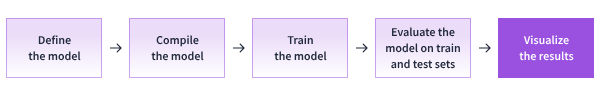

 A scatterplot is a good option to visualize the predictions against the actual values:

    plt.scatter(y_train, pred_train)
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.show()

This will produce a scatterplot, which, in this case, indicates that there seems to be linear relationship between actual and predicted values. This also supports the higher R-squared value we achieved with the training data.

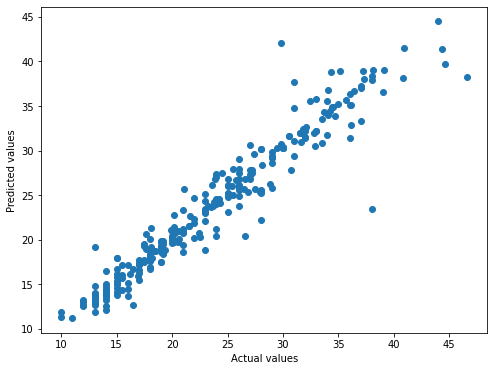

In [27]:
X_train

array([[0.0, 0.6385214007782101, 1.0, ..., 0.0, 0.5, 1.0],
       [0.0, 0.38715953307393, 0.0, ..., 0.0, 0.355, 0.0],
       [0.0, 0.3978599221789883, 0.0, ..., 1.0, 0.34, 0.0],
       ...,
       [0.0, 0.5447470817120622, 1.0, ..., 0.0, 0.525, 0.0],
       [0.0, 0.6313229571984436, 1.0, ..., 0.0, 0.575, 1.0],
       [0.0, 0.8608949416342413, 1.0, ..., 0.0, 1.0, 0.0]], dtype=object)

In [23]:
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt


#Fit the model on the training data
model.fit(X_train, y_train, epochs=150, verbose=0)

#evaluate the model on the test data and print results
model.evaluate(X_train, y_train)


#generate test predictions
pred_test = model.predict(X_test)
r_squared_value = r2_score(y_test, pred_test)
print(r_squared_value)

plt.scatter(x=y_test,y=pred_test)
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.show()


ValueError: Invalid dtype: object